# 2. Grouping songs together!

## 2.1 Getting your data!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import math
import random
import re
pd.set_option('display.max_columns', 820)

**ECHONEST DATASET**

In [2]:
echonest = pd.read_csv("echonest.csv")

In [3]:
echonest.shape

(13129, 250)

In [4]:
echonest.head()

,track_id,audio_features_acousticness,audio_features_danceability,audio_features_energy,audio_features_instrumentalness,audio_features_liveness,audio_features_speechiness,audio_features_tempo,audio_features_valence,metadata_album_date,metadata_album_name,metadata_artist_latitude,metadata_artist_location,metadata_artist_longitude,metadata_artist_name,metadata_release,ranks_artist_discovery_rank,ranks_artist_familiarity_rank,ranks_artist_hotttnesss_rank,ranks_song_currency_rank,ranks_song_hotttnesss_rank,social_features_artist_discovery,social_features_artist_familiarity,social_features_artist_hotttnesss,social_features_song_currency,social_features_song_hotttnesss,temporal_features_000,temporal_features_001,temporal_features_002,temporal_features_003,temporal_features_004,temporal_features_005,temporal_features_006,temporal_features_007,temporal_features_008,temporal_features_009,temporal_features_010,temporal_features_011,temporal_features_012,temporal_features_013,temporal_features_014,temporal_features_015,temporal_features_016,temporal_features_017,temporal_features_018,temporal_features_019,temporal_features_020,temporal_features_021,temporal_features_022,temporal_features_023,temporal_features_024,temporal_features_025,temporal_features_026,temporal_features_027,temporal_features_028,temporal_features_029,temporal_features_030,temporal_features_031,temporal_features_032,temporal_features_033,temporal_features_034,temporal_features_035,temporal_features_036,temporal_features_037,temporal_features_038,temporal_features_039,temporal_features_040,temporal_features_041,temporal_features_042,temporal_features_043,temporal_features_044,temporal_features_045,temporal_features_046,temporal_features_047,temporal_features_048,temporal_features_049,temporal_features_050,temporal_features_051,temporal_features_052,temporal_features_053,temporal_features_054,temporal_features_055,temporal_features_056,temporal_features_057,temporal_features_058,temporal_features_059,temporal_features_060,temporal_features_061,temporal_features_062,temporal_features_063,temporal_features_064,temporal_features_065,temporal_features_066,temporal_features_067,temporal_features_068,temporal_features_069,temporal_features_070,temporal_features_071,temporal_features_072,temporal_features_073,temporal_features_074,temporal_features_075,temporal_features_076,temporal_features_077,temporal_features_078,temporal_features_079,temporal_features_080,temporal_features_081,temporal_features_082,temporal_features_083,temporal_features_084,temporal_features_085,temporal_features_086,temporal_features_087,temporal_features_088,temporal_features_089,temporal_features_090,temporal_features_091,temporal_features_092,temporal_features_093,temporal_features_094,temporal_features_095,temporal_features_096,temporal_features_097,temporal_features_098,temporal_features_099,temporal_features_100,temporal_features_101,temporal_features_102,temporal_features_103,temporal_features_104,temporal_features_105,temporal_features_106,temporal_features_107,temporal_features_108,temporal_features_109,temporal_features_110,temporal_features_111,temporal_features_112,temporal_features_113,temporal_features_114,temporal_features_115,temporal_features_116,temporal_features_117,temporal_features_118,temporal_features_119,temporal_features_120,temporal_features_121,temporal_features_122,temporal_features_123,temporal_features_124,temporal_features_125,temporal_features_126,temporal_features_127,temporal_features_128,temporal_features_129,temporal_features_130,temporal_features_131,temporal_features_132,temporal_features_133,temporal_features_134,temporal_features_135,temporal_features_136,temporal_features_137,temporal_features_138,temporal_features_139,temporal_features_140,temporal_features_141,temporal_features_142,temporal_features_143,temporal_features_144,temporal_features_145,temporal_features_146,temporal_features_147,temporal_features_148,temporal_features_149,temporal_features_150,tempor

**FEATURES DATASET**

In [5]:
features = pd.read_csv("features.csv")

In [6]:
features.shape

(106574, 519)

In [7]:
features.head()

,track_id,chroma_cens_kurtosis_01,chroma_cens_kurtosis_02,chroma_cens_kurtosis_03,chroma_cens_kurtosis_04,chroma_cens_kurtosis_05,chroma_cens_kurtosis_06,chroma_cens_kurtosis_07,chroma_cens_kurtosis_08,chroma_cens_kurtosis_09,chroma_cens_kurtosis_10,chroma_cens_kurtosis_11,chroma_cens_kurtosis_12,chroma_cens_max_01,chroma_cens_max_02,chroma_cens_max_03,chroma_cens_max_04,chroma_cens_max_05,chroma_cens_max_06,chroma_cens_max_07,chroma_cens_max_08,chroma_cens_max_09,chroma_cens_max_10,chroma_cens_max_11,chroma_cens_max_12,chroma_cens_mean_01,chroma_cens_mean_02,chroma_cens_mean_03,chroma_cens_mean_04,chroma_cens_mean_05,chroma_cens_mean_06,chroma_cens_mean_07,chroma_cens_mean_08,chroma_cens_mean_09,chroma_cens_mean_10,chroma_cens_mean_11,chroma_cens_mean_12,chroma_cens_median_01,chroma_cens_median_02,chroma_cens_median_03,chroma_cens_median_04,chroma_cens_median_05,chroma_cens_median_06,chroma_cens_median_07,chroma_cens_median_08,chroma_cens_median_09,chroma_cens_median_10,chroma_cens_median_11,chroma_cens_median_12,chroma_cens_min_01,chroma_cens_min_02,chroma_cens_min_03,chroma_cens_min_04,chroma_cens_min_05,chroma_cens_min_06,chroma_cens_min_07,chroma_cens_min_08,chroma_cens_min_09,chroma_cens_min_10,chroma_cens_min_11,chroma_cens_min_12,chroma_cens_skew_01,chroma_cens_skew_02,chroma_cens_skew_03,chroma_cens_skew_04,chroma_cens_skew_05,chroma_cens_skew_06,chroma_cens_skew_07,chroma_cens_skew_08,chroma_cens_skew_09,chroma_cens_skew_10,chroma_cens_skew_11,chroma_cens_skew_12,chroma_cens_std_01,chroma_cens_std_02,chroma_cens_std_03,chroma_cens_std_04,chroma_cens_std_05,chroma_cens_std_06,chroma_cens_std_07,chroma_cens_std_08,chroma_cens_std_09,chroma_cens_std_10,chroma_cens_std_11,chroma_cens_std_12,chroma_cqt_kurtosis_01,chroma_cqt_kurtosis_02,chroma_cqt_kurtosis_03,chroma_cqt_kurtosis_04,chroma_cqt_kurtosis_05,chroma_cqt_kurtosis_06,chroma_cqt_kurtosis_07,chroma_cqt_kurtosis_08,chroma_cqt_kurtosis_09,chroma_cqt_kurtosis_10,chroma_cqt_kurtosis_11,chroma_cqt_kurtosis_12,chroma_cqt_max_01,chroma_cqt_max_02,chroma_cqt_max_03,chroma_cqt_max_04,chroma_cqt_max_05,chroma_cqt_max_06,chroma_cqt_max_07,chroma_cqt_max_08,chroma_cqt_max_09,chroma_cqt_max_10,chroma_cqt_max_11,chroma_cqt_max_12,chroma_cqt_mean_01,chroma_cqt_mean_02,chroma_cqt_mean_03,chroma_cqt_mean_04,chroma_cqt_mean_05,chroma_cqt_mean_06,chroma_cqt_mean_07,chroma_cqt_mean_08,chroma_cqt_mean_09,chroma_cqt_mean_10,chroma_cqt_mean_11,chroma_cqt_mean_12,chroma_cqt_median_01,chroma_cqt_median_02,chroma_cqt_median_03,chroma_cqt_median_04,chroma_cqt_median_05,chroma_cqt_median_06,chroma_cqt_median_07,chroma_cqt_median_08,chroma_cqt_median_09,chroma_cqt_median_10,chroma_cqt_median_11,chroma_cqt_median_12,chroma_cqt_min_01,chroma_cqt_min_02,chroma_cqt_min_03,chroma_cqt_min_04,chroma_cqt_min_05,chroma_cqt_min_06,chroma_cqt_min_07,chroma_cqt_min_08,chroma_cqt_min_09,chroma_cqt_min_10,chroma_cqt_min_11,chroma_cqt_min_12,chroma_cqt_skew_01,chroma_cqt_skew_02,chroma_cqt_skew_03,chroma_cqt_skew_04,chroma_cqt_skew_05,chroma_cqt_skew_06,chroma_cqt_skew_07,chroma_cqt_skew_08,chroma_cqt_skew_09,chroma_cqt_skew_10,chroma_cqt_skew_11,chroma_cqt_skew_12,chroma_cqt_std_01,chroma_cqt_std_02,chroma_cqt_std_03,chroma_cqt_std_04,chroma_cqt_std_05,chroma_cqt_std_06,chroma_cqt_std_07,chroma_cqt_std_08,chroma_cqt_std_09,chroma_cqt_std_10,chroma_cqt_std_11,chroma_cqt_std_12,chroma_stft_kurtosis_01,chroma_stft_kurtosis_02,chroma_stft_kurtosis_03,chroma_stft_kurtosis_04,chroma_stft_kurtosis_05,chroma_stft_kurtosis_06,chroma_stft_kurtosis_07,chroma_stft_kurtosis_08,chroma_stft_kurtosis_09,chroma_stft_kurtosis_10,chroma_stft_kurtosis_11,chroma_stft_kurtosis_12,chroma_stft_max_01,chroma_stft_max_02,chroma_stft_max_03,chroma_stft_max_04,chroma_stft_max_05,chroma_stft_max_06,chroma_stft_max_07,chroma_stft_max_08,chroma_stft_max_09,chroma_stft_max_10,chroma_stft_max_11,chroma_stft_max_12,chroma_stft_mean_01,chroma_stft_mean_02,chroma_stft_mean_03,chroma_stft_mean_04,chroma_stft_mean_05,chroma_stft_mean_06,chroma

**TRACKS DATASET**

In [8]:
tracks = pd.read_csv("tracks.csv")

In [9]:
tracks.shape

(106574, 53)

In [10]:
tracks.head()

,track_id,album_comments,album_date_created,album_date_released,album_engineer,album_favorites,album_id,album_information,album_listens,album_producer,album_tags,album_title,album_tracks,album_type,artist_active_year_begin,artist_active_year_end,artist_associated_labels,artist_bio,artist_comments,artist_date_created,artist_favorites,artist_id,artist_latitude,artist_location,artist_longitude,artist_members,artist_name,artist_related_projects,artist_tags,artist_website,artist_wikipedia_page,set_split,set_subset,track_bit_rate,track_comments,track_composer,track_date_created,track_date_recorded,track_duration,track_favorites,track_genre_top,track_genres,track_genres_all,track_information,track_interest,track_language_code,track_license,track_listens,track_lyricist,track_number,track_publisher,track_tags,track_title
0,2,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,[],AWOL - A Way Of Life,7,Album,2006-01-01 00:00:00,NaN,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0,2008-11-26 01:42:32,9,1,40.058324,New Jersey,-74.405661,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,['awol'],http://www.AzillionRecords.blogspot.com,NaN,training,small,256000,0,NaN,2008-11-26 01:48:12,2008-11-26 00:00:00,168,2,Hip-Hop,[21],[21],NaN,4656,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293,NaN,3,NaN,[],Food
1,3,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,[],AWOL - A Way Of Life,7,Album,2006-01-01 00:00:00,NaN,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0,2008-11-26 01:42:32,9,1,40.058324,New Jersey,-74.405661,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,['awol'],http://www.AzillionRecords.blogspot.com,NaN,training,medium,256000,0,NaN,2008-11-26 01:48:14,2008-11-26 00:00:00,237,1,Hip-Hop,[21],[21],NaN,1470,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514,NaN,4,NaN,[],Electric Ave
2,5,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,[],AWOL - A Way Of Life,7,Album,2006-01-01 00:00:00,NaN,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0,2008-11-26 01:42:32,9,1,40.058324,New Jersey,-74.405661,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,['awol'],http://www.AzillionRecords.blogspot.com,NaN,training,small,256000,0,NaN,2008-11-26 01:48:20,2008-11-26 00:00:00,206,6,Hip-Hop,[21],[21],NaN,1933,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151,NaN,6,NaN,[],This World
3,10,0,2008-11-26 01:45:08,2008-02-06 00:00:00,NaN,4,6,NaN,47632,NaN,[],Constant Hitmaker,2,Album,NaN,NaN,"Mexican Summer, Richie Records, Woodsist, Skul...","<p><span style=""font-family:Verdana, Geneva, A...",3,2008-11-26 01:42:55,74,6,NaN,NaN,NaN,"Kurt Vile, the Violators",Kurt Vile,NaN,"['philly', 'kurt vile']",http://kurtvile.com,NaN,training,small,192000,0,Kurt Vile,2008-11-25 17:49:06,2008-11-26 00:00:00,161,178,Pop,[10],[10],NaN,54881,en,Attribution-NonCommercial-NoDerivatives (aka M...,50135,NaN,1,NaN,[],Freeway
4,20,0,2008-11-26 01:45:05,2009-01-06 00:00:00,NaN,2,4,"<p> ""spiritual songs"" from Nicky Cook</p>",2710,NaN,[],Niris,13,Album,1990-01-01 00:00:00,2011-01-01 00:00:00,NaN,<p>Songs written by: Nicky Cook</p>\n<p>VOCALS...,2,2008-11-26 01:42:52,10,4,51.895927,Colchester England,0.891874,Nicky Cook\n,Nicky Cook,NaN,"['instrumentals', 'experimental pop', 'post pu...",NaN,NaN,training,large,256000,0,NaN,2008-11-26 01:48:56,2008-01-01 00:00:00,311,0,NaN,"[76, 103]","[17, 10, 76, 103]",NaN,978,en,Attribution-NonCommercial-NoDerivatives (aka M...,361,NaN,3,NaN,[],Spiritual Level


In order to clean the data you need to replace all symbols indicating missing values with NaN. 

In [11]:
tracks[tracks["track_tags"] == "[]"].shape

(83078, 53)

In [12]:
tracks["track_tags"] = tracks["track_tags"].replace('[]', np.nan)

In [13]:
tracks[tracks["album_information"] == "<p></p>"].shape

(93, 53)

In [14]:
tracks["album_information"] =  tracks["album_information"].replace("<p></p>", np.nan)

In [15]:
tracks[tracks["album_tags"] == "[]"].shape

(83549, 53)

In [16]:
tracks["album_tags"] =  tracks["album_tags"].replace('[]', np.nan)

The features *album_information* and *artist_bio* contain some anomalous characters, in order to obtain clean data we can remove them.

In [17]:
tracks["album_information"] = tracks["album_information"].replace({r'<[^>]+>':''}, regex=True)

In [18]:
tracks["artist_bio"] = tracks["artist_bio"].replace({r'<[^>]+>':''}, regex=True)

**MERGE DATASET**

In order to obtain a single dataset, the merge is performed using as key the feature **track_id** that is present in each of the datasets that we want to combine and that uniquely identifies each song. The dataset that we obtain is called **df**.

In [19]:
df1 = echonest.merge(features)
df = df1.merge(tracks)

In [20]:
df.shape

(13129, 820)

In [21]:
df.head()

,track_id,audio_features_acousticness,audio_features_danceability,audio_features_energy,audio_features_instrumentalness,audio_features_liveness,audio_features_speechiness,audio_features_tempo,audio_features_valence,metadata_album_date,metadata_album_name,metadata_artist_latitude,metadata_artist_location,metadata_artist_longitude,metadata_artist_name,metadata_release,ranks_artist_discovery_rank,ranks_artist_familiarity_rank,ranks_artist_hotttnesss_rank,ranks_song_currency_rank,ranks_song_hotttnesss_rank,social_features_artist_discovery,social_features_artist_familiarity,social_features_artist_hotttnesss,social_features_song_currency,social_features_song_hotttnesss,temporal_features_000,temporal_features_001,temporal_features_002,temporal_features_003,temporal_features_004,temporal_features_005,temporal_features_006,temporal_features_007,temporal_features_008,temporal_features_009,temporal_features_010,temporal_features_011,temporal_features_012,temporal_features_013,temporal_features_014,temporal_features_015,temporal_features_016,temporal_features_017,temporal_features_018,temporal_features_019,temporal_features_020,temporal_features_021,temporal_features_022,temporal_features_023,temporal_features_024,temporal_features_025,temporal_features_026,temporal_features_027,temporal_features_028,temporal_features_029,temporal_features_030,temporal_features_031,temporal_features_032,temporal_features_033,temporal_features_034,temporal_features_035,temporal_features_036,temporal_features_037,temporal_features_038,temporal_features_039,temporal_features_040,temporal_features_041,temporal_features_042,temporal_features_043,temporal_features_044,temporal_features_045,temporal_features_046,temporal_features_047,temporal_features_048,temporal_features_049,temporal_features_050,temporal_features_051,temporal_features_052,temporal_features_053,temporal_features_054,temporal_features_055,temporal_features_056,temporal_features_057,temporal_features_058,temporal_features_059,temporal_features_060,temporal_features_061,temporal_features_062,temporal_features_063,temporal_features_064,temporal_features_065,temporal_features_066,temporal_features_067,temporal_features_068,temporal_features_069,temporal_features_070,temporal_features_071,temporal_features_072,temporal_features_073,temporal_features_074,temporal_features_075,temporal_features_076,temporal_features_077,temporal_features_078,temporal_features_079,temporal_features_080,temporal_features_081,temporal_features_082,temporal_features_083,temporal_features_084,temporal_features_085,temporal_features_086,temporal_features_087,temporal_features_088,temporal_features_089,temporal_features_090,temporal_features_091,temporal_features_092,temporal_features_093,temporal_features_094,temporal_features_095,temporal_features_096,temporal_features_097,temporal_features_098,temporal_features_099,temporal_features_100,temporal_features_101,temporal_features_102,temporal_features_103,temporal_features_104,temporal_features_105,temporal_features_106,temporal_features_107,temporal_features_108,temporal_features_109,temporal_features_110,temporal_features_111,temporal_features_112,temporal_features_113,temporal_features_114,temporal_features_115,temporal_features_116,temporal_features_117,temporal_features_118,temporal_features_119,temporal_features_120,temporal_features_121,temporal_features_122,temporal_features_123,temporal_features_124,temporal_features_125,temporal_features_126,temporal_features_127,temporal_features_128,temporal_features_129,temporal_features_130,temporal_features_131,temporal_features_132,temporal_features_133,temporal_features_134,temporal_features_135,temporal_features_136,temporal_features_137,temporal_features_138,temporal_features_139,temporal_features_140,temporal_features_141,temporal_features_142,temporal_features_143,temporal_features_144,temporal_features_145,temporal_features_146,temporal_features_147,temporal_features_148,temporal_features_149,temporal_features_150,tempor

Check if there are duplicates inside the track_id variable in order to understand if each row corresponds to a different song.

In [22]:
df["track_id"].unique().shape

(13129,)

The number of unique values contained into the variable *track_id* is equal to the number of rows of the dataset, so there aren't duplicates.

### NULL VALUES 

It's important to understand what are the features that have null values and how much null values there are in the dataset. 

In [23]:
navalues = df.isna().sum() #count of Na
navalues = navalues != 0 #only na value
na = navalues[navalues.values == True]
print("There are", int(na.shape[0]), "features in which there are NA values.")
print("The features in which there are NA values are: \n", list(na.index))

There are 39 features in which there are NA values.
The features in which there are NA values are: 
 ['metadata_album_date', 'metadata_album_name', 'metadata_artist_latitude', 'metadata_artist_location', 'metadata_artist_longitude', 'ranks_artist_discovery_rank', 'ranks_artist_familiarity_rank', 'ranks_artist_hotttnesss_rank', 'ranks_song_currency_rank', 'ranks_song_hotttnesss_rank', 'album_date_created', 'album_date_released', 'album_engineer', 'album_information', 'album_producer', 'album_tags', 'album_type', 'artist_active_year_begin', 'artist_active_year_end', 'artist_associated_labels', 'artist_bio', 'artist_date_created', 'artist_latitude', 'artist_location', 'artist_longitude', 'artist_members', 'artist_related_projects', 'artist_website', 'artist_wikipedia_page', 'track_composer', 'track_date_recorded', 'track_genre_top', 'track_information', 'track_language_code', 'track_license', 'track_lyricist', 'track_publisher', 'track_tags', 'track_title']


Considering that the total number of observations is 13129, we can remove all columns that have more than 10000 null values.

In [24]:
navalues = df.isna().sum() #
navalues = navalues > 10000 
na = navalues[navalues.values == True]
print("There are", na.shape[0], "features in which there are more than 10000 null values.")
print("The features in which there are more than 10000 null values are: \n", list(na.index))

There are 21 features in which there are more than 10000 null values.
The features in which there are more than 10000 null values are: 
 ['metadata_album_date', 'metadata_album_name', 'ranks_artist_discovery_rank', 'ranks_artist_familiarity_rank', 'ranks_artist_hotttnesss_rank', 'ranks_song_currency_rank', 'ranks_song_hotttnesss_rank', 'album_engineer', 'album_producer', 'album_tags', 'artist_active_year_begin', 'artist_active_year_end', 'artist_associated_labels', 'artist_related_projects', 'artist_wikipedia_page', 'track_composer', 'track_date_recorded', 'track_information', 'track_lyricist', 'track_publisher', 'track_tags']


In [25]:
df.drop(['metadata_album_date', 'metadata_album_name', 'ranks_artist_discovery_rank', 'ranks_artist_familiarity_rank', 
                'ranks_artist_hotttnesss_rank', 'ranks_song_currency_rank', 'ranks_song_hotttnesss_rank', 'album_engineer', 
                'album_producer', 'album_tags', 'artist_active_year_begin', 'artist_active_year_end', 'artist_associated_labels',
                'artist_related_projects', 'artist_wikipedia_page', 'track_composer', 'track_date_recorded', 'track_information', 
                'track_lyricist', 'track_publisher', 'track_tags'], axis=1, inplace= True)

In [26]:
df.shape

(13129, 799)

In [27]:
navalues = pd.DataFrame(df.isna().sum())
navalues = navalues[navalues[0] != 0]
print("There are", navalues.shape[0], "features that have less than 10000 null values:")
navalues.rename(columns={0: 'Number of NaN'})

There are 18 features that have less than 10000 null values:


,Number of NaN
metadata_artist_latitude,3359
metadata_artist_location,3359
metadata_artist_longitude,3359
album_date_created,191
album_date_released,3817
album_information,2576
album_type,303
artist_bio,3490
artist_date_created,52
artist_latitude,5077


In order to understand how to interpolate the Na values is important to understand what is the type of the features that contain null values.

In [28]:
list(navalues.index)

['metadata_artist_latitude',
 'metadata_artist_location',
 'metadata_artist_longitude',
 'album_date_created',
 'album_date_released',
 'album_information',
 'album_type',
 'artist_bio',
 'artist_date_created',
 'artist_latitude',
 'artist_location',
 'artist_longitude',
 'artist_members',
 'artist_website',
 'track_genre_top',
 'track_language_code',
 'track_license',
 'track_title']

In [29]:
df[['metadata_artist_latitude', 'metadata_artist_location', 'metadata_artist_longitude','album_date_created',
    'album_date_released', 'album_information', 'album_type', 'artist_bio', 'artist_date_created', 'artist_latitude',
    'artist_location', 'artist_longitude', 'artist_members', 'artist_website', 'track_genre_top', 'track_language_code',
    'track_license','track_title']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13129 entries, 0 to 13128
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   metadata_artist_latitude   9770 non-null   float64
 1   metadata_artist_location   9770 non-null   object 
 2   metadata_artist_longitude  9770 non-null   float64
 3   album_date_created         12938 non-null  object 
 4   album_date_released        9312 non-null   object 
 5   album_information          10553 non-null  object 
 6   album_type                 12826 non-null  object 
 7   artist_bio                 9639 non-null   object 
 8   artist_date_created        13077 non-null  object 
 9   artist_latitude            8052 non-null   float64
 10  artist_location            9083 non-null   object 
 11  artist_longitude           8052 non-null   float64
 12  artist_members             6760 non-null   object 
 13  artist_website             10471 non-null  obj

In particular, the variables  *"metadata_artist_latitude"*, *"artist_latitude"*,  *"metadata_artist_longitude"*, *"artist_longitude"* do not contain relevant informations in order to group the songs, so we can drop it. 

In [30]:
df = df.drop(["metadata_artist_latitude", "artist_latitude",  "metadata_artist_longitude", "artist_longitude"], axis = 1, inplace = False)

In [31]:
print("At the end of our step of data wrangling we have a dataset that has the following shape:", df.shape)

At the end of our step of data wrangling we have a dataset that has the following shape: (13129, 795)


In [32]:
df.head()

,track_id,audio_features_acousticness,audio_features_danceability,audio_features_energy,audio_features_instrumentalness,audio_features_liveness,audio_features_speechiness,audio_features_tempo,audio_features_valence,metadata_artist_location,metadata_artist_name,metadata_release,social_features_artist_discovery,social_features_artist_familiarity,social_features_artist_hotttnesss,social_features_song_currency,social_features_song_hotttnesss,temporal_features_000,temporal_features_001,temporal_features_002,temporal_features_003,temporal_features_004,temporal_features_005,temporal_features_006,temporal_features_007,temporal_features_008,temporal_features_009,temporal_features_010,temporal_features_011,temporal_features_012,temporal_features_013,temporal_features_014,temporal_features_015,temporal_features_016,temporal_features_017,temporal_features_018,temporal_features_019,temporal_features_020,temporal_features_021,temporal_features_022,temporal_features_023,temporal_features_024,temporal_features_025,temporal_features_026,temporal_features_027,temporal_features_028,temporal_features_029,temporal_features_030,temporal_features_031,temporal_features_032,temporal_features_033,temporal_features_034,temporal_features_035,temporal_features_036,temporal_features_037,temporal_features_038,temporal_features_039,temporal_features_040,temporal_features_041,temporal_features_042,temporal_features_043,temporal_features_044,temporal_features_045,temporal_features_046,temporal_features_047,temporal_features_048,temporal_features_049,temporal_features_050,temporal_features_051,temporal_features_052,temporal_features_053,temporal_features_054,temporal_features_055,temporal_features_056,temporal_features_057,temporal_features_058,temporal_features_059,temporal_features_060,temporal_features_061,temporal_features_062,temporal_features_063,temporal_features_064,temporal_features_065,temporal_features_066,temporal_features_067,temporal_features_068,temporal_features_069,temporal_features_070,temporal_features_071,temporal_features_072,temporal_features_073,temporal_features_074,temporal_features_075,temporal_features_076,temporal_features_077,temporal_features_078,temporal_features_079,temporal_features_080,temporal_features_081,temporal_features_082,temporal_features_083,temporal_features_084,temporal_features_085,temporal_features_086,temporal_features_087,temporal_features_088,temporal_features_089,temporal_features_090,temporal_features_091,temporal_features_092,temporal_features_093,temporal_features_094,temporal_features_095,temporal_features_096,temporal_features_097,temporal_features_098,temporal_features_099,temporal_features_100,temporal_features_101,temporal_features_102,temporal_features_103,temporal_features_104,temporal_features_105,temporal_features_106,temporal_features_107,temporal_features_108,temporal_features_109,temporal_features_110,temporal_features_111,temporal_features_112,temporal_features_113,temporal_features_114,temporal_features_115,temporal_features_116,temporal_features_117,temporal_features_118,temporal_features_119,temporal_features_120,temporal_features_121,temporal_features_122,temporal_features_123,temporal_features_124,temporal_features_125,temporal_features_126,temporal_features_127,temporal_features_128,temporal_features_129,temporal_features_130,temporal_features_131,temporal_features_132,temporal_features_133,temporal_features_134,temporal_features_135,temporal_features_136,temporal_features_137,temporal_features_138,temporal_features_139,temporal_features_140,temporal_features_141,temporal_features_142,temporal_features_143,temporal_features_144,temporal_features_145,temporal_features_146,temporal_features_147,temporal_features_148,temporal_features_149,temporal_features_150,temporal_features_151,temporal_features_152,temporal_features_153,temporal_features_154,temporal_features_155,temporal_features_156,temporal_features_157,temporal_features_158,temporal_features_159,temporal_features_160,temporal_feature

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13129 entries, 0 to 13128
Columns: 795 entries, track_id to track_title
dtypes: float64(755), int64(16), object(24)
memory usage: 79.7+ MB


## 2.2 Choose your features (variables)!

Before to apply the dimensionality reduction method we need to select some variables that we want to keep.

In [34]:
storagedata = df[["track_title", "track_license", "track_genre_top", "track_genres", "track_duration",
                       "track_date_created", "artist_name", "artist_bio", "album_type","album_information","album_title", 
                  "album_date_created", "album_date_released", "track_id", "audio_features_acousticness", "audio_features_danceability","audio_features_energy", 
                         "audio_features_instrumentalness", "audio_features_liveness", "audio_features_speechiness",
                         "audio_features_tempo"]]

After removing these variables from the dataset you can make the pca.

In [35]:
dfpca = df.drop(["track_title", "track_license", "track_genre_top", "track_genres", "track_duration",
                       "track_date_created", "artist_name", "artist_bio", "album_type","album_information","album_title", 
                  "album_date_created", "album_date_released", "track_id", "audio_features_acousticness", "audio_features_danceability","audio_features_energy", 
                         "audio_features_instrumentalness", "audio_features_liveness", "audio_features_speechiness",
                         "audio_features_tempo"], axis = 1, inplace = False)

In [36]:
dfpca.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13129 entries, 0 to 13128
Columns: 774 entries, audio_features_valence to track_number
dtypes: float64(748), int64(14), object(12)
memory usage: 77.6+ MB


Now, we select only the quantitative variables and we stansardize them. This means that for each row of the dfpca dataset we apply the following formula: 

$${z_i = \frac{x_i-\overline{x}}{\sigma}}$$

where $\overline{x}$ is the mean and $\sigma$ is the standard deviation. 

In [37]:
dfpca = dfpca.select_dtypes("number")

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
dfpca = pd.DataFrame(StandardScaler().fit_transform(dfpca))

In [40]:
dfpca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761
0,0.495983,0.584512,0.782963,0.447205,-0.15861,-0.537540,2.602372,0.919566,-0.082752,-0.092399,-0.481088,-0.130599,-0.224785,-0.178109,-0.586609,-0.732929,0.149177,0.245649,2.655370,0.828443,-0.099867,-0.239930,-0.471167,-0.179055,-0.174634,-0.015079,-0.590848,-0.664598,0.401624,0.435481,-1.187552,0.768230,-0.514756,-0.212445,-0.896330,-0.470198,-0.491265,-0.502023,-0.459224,-0.682896,-0.327814,-0.390538,0.649582,-0.037683,0.156669,0.517183,0.354808,-0.162176,0.090444,1.713759,-0.186016,-0.255811,0.622127,0.056150,0.075617,0.079178,0.124929,0.190263,0.13108,0.150559,0.137337,0.117123,0.147326,0.116983,0.160959,0.125212,-0.393848,0.086450,0.040376,0.039284,-0.023378,0.195884,0.100843,-0.564570,0.198812,0.208853,-0.020898,0.095642,-2.679503,-0.738006,-0.112927,-0.155050,-0.046527,-0.307922,-0.024789,0.135252,0.479164,0.612479,-0.168256,-0.466567,0.578836,-0.459793,-0.163492,-0.254900,-0.176594,-0.337257,-0.128744,-0.056136,0.077169,0.208966,-0.200634,-0.291882,0.217817,0.958685,0.459904,0.627155,0.421486,0.518012,0.402504,0.363491,-0.406176,-0.209

After the standardization we can apply the PCA in order to reduce the dimensionality. 

In [41]:
from sklearn.decomposition import PCA

In [42]:
pca = PCA(n_components = 65)
dfpca = pca.fit_transform(dfpca) 
explainedvariance = (pca.explained_variance_ratio_)
print((explainedvariance))
print(sum(pca.explained_variance_ratio_)) 

[0.10611532 0.07490348 0.03577845 0.0287426  0.02536765 0.02377405
 0.02247273 0.02155077 0.01988591 0.01728653 0.01590327 0.01421915
 0.01338354 0.0128067  0.01244316 0.01151459 0.0114236  0.01118168
 0.01035811 0.01000334 0.0097625  0.0085955  0.00782028 0.0074992
 0.00721986 0.00669272 0.00649838 0.00604429 0.00573254 0.00566679
 0.00549323 0.00529307 0.00513061 0.00503041 0.00490976 0.00473844
 0.00459474 0.004528   0.00440211 0.00431443 0.00416561 0.00403917
 0.00394759 0.00387335 0.00380784 0.00368431 0.00360119 0.00351053
 0.00335538 0.00333735 0.00330086 0.00324983 0.00319812 0.00310012
 0.00308909 0.00302877 0.0029044  0.002891   0.00284376 0.00277647
 0.00276313 0.00273939 0.0026807  0.00267279 0.00258023]
0.7002224673489295


PCA allowed us to reduce dimensionality to 65 features preserving 70.00% of the total variance.

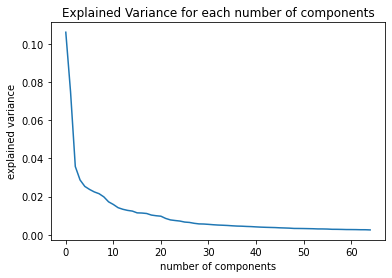

In [43]:
plt.plot(explainedvariance)
plt.ticklabel_format(axis="y", style="plain")
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.title('Explained Variance for each number of components')
plt.show()

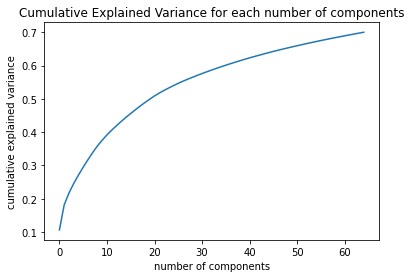

In [44]:
plt.plot(np.cumsum(explainedvariance))
plt.ticklabel_format(axis="y", style="plain")
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('Cumulative Explained Variance for each number of components')
plt.show()

In [45]:
dfpca = pd.DataFrame(dfpca)

In [46]:
dfpca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64
0,3.005227,-2.692146,-5.785975,4.535289,2.807772,1.876450,6.783434,-0.936042,-2.229150,4.612511,-4.559548,1.358909,-4.347862,5.180548,-0.332410,2.102559,-1.135134,-0.760272,1.810950,0.785624,-2.434904,-1.016725,-2.106466,1.855416,0.164381,2.594544,-0.849372,0.567268,-2.674732,1.657325,-1.094747,1.491201,-0.568989,-0.620462,-1.026052,1.579188,1.459515,-1.591884,2.496705,-0.277120,-0.517730,-3.430439,0.428088,-1.426741,-0.713404,-1.783889,-0.570790,2.086599,0.452752,-1.151964,1.341405,0.230849,1.198055,-1.249053,0.601545,-1.194247,-1.392211,0.200434,-0.246968,-1.298940,-0.961409,2.083138,0.105227,-0.800034,-0.593849
1,5.660262,-5.273787,-5.205453,-1.660559,-3.647710,2.598482,-1.562680,5.849242,-0.147735,4.402888,-1.975205,2.333594,-1.017385,3.803245,1.912077,0.937988,-2.270232,-3.840962,-0.166626,1.970812,0.067716,-1.420509,-0.093115,3.724351,0.026242,0.946036,0.807311,-0.586252,-1.728108,-0.370881,0.284342,1.340091,-0.557502,-0.543373,0.299763,2.860520,-0.717790,-1.343717,0.900749,3.150023,1.804378,-0.758046,-0.707706,-0.184522,-2.024161,-3.127196,-1.502800,-0.276525,0.880978,-0.035067,-0.067059,-0.412499,1.835475,0.130263,-1.311801,-2.130291,-1.170123,0.979210,-1.167462,-0.290518,-0.885321,0.669689,-0.434434,0.302520,-0.509284
2,2.542503,-3.989936,-4.602170,-0.022248,-3.011921,1.977457,-1.313339,-0.437229,-0.134744,2.069422,-1.901167,2.942114,-3.241928,2.486110,0.197200,1.882858,-0.866274,-3.065538,2.808268,-1.335724,-2.863677,-0.851650,2.325465,2.806531,-0.758848,2.206576,1.139998,-0.565486,-0.859217,-0.725061,-0.348496,-0.572297,2.979728,0.613918,-1.881598,0.412390,0.423324,-1.383836,-0.033730,2.246134,0.912954,-1.677269,0.184678,-0.883508,-1.345025,0.739974,-0.313747,0.789263,-1.560311,-2.303512,1.021459,0.886956,3.096141,-1.722852,-0.896581,-2.658587,-1.840679,-1.602690,-0.068739,0.664169,-1.407235,0.031284,-1.772612,0.498590,1.262289
3,9.132552,3.691115,-5.591380,0.703083,-1.415819,0.573410,-1.828961,4.096514,-0.553969,4.888736,-1.752694,6.634898,1.749282,0.193082,-1.509124,-4.695811,-0.087440,-2.308710,3.157058,-1.724883,-2.186574,3.434096,-3.491864,0.480563,1.796322,1.607104,-0.760835,-0.156910,4.946909,5.607200,1.678682,3.873285,1.038618,-0.907930,0.619166,0.196710,-6.049400,-1.846202,-0.587662,0.684801,-0.261483,-1.822574,0.851317,0.817143,-2.344205,-1.682157,-0.037464,0.365776,-2.521076,-2.939728,0.006084,-1.242766,0.029029,0.103039,1.526873,0.132438,0.295271,0.854872,-1.070156,-1.156469,-0.947787,1.202917,-0.065056,0.015646,-3.790451
4,1.226369,-9.314074,-4.208368,0.620496,-3.886939,-1.248008,-2.951836,-2.271016,-0.533076,2.695625,-0.429015,1.272986,-1.407669,0.961603,-0.900350,1.899476,2.044555,-1.923327,0.839099,2.709279,-0.404713,-1.730215,0.186395,0.136217,-0.940178,2.965288,1.501293,0.073207,-0.491962,1.876536,0.073688,-0.871346,0.165785,-1.188402,-2.600443,0.412613,0.342879,-0.988453,-1.756304,1.691345,-0.817439,-1.384394,-0.365042,-0.528921,0.216324,-1.409897,-0.382970,-0.070977,-0.875085,-0.733006,-0.297497,0.297386,-0.014805,-0.251041,0.999623,0.151432,-2.481204,1.327819,-2.342436,1.240273,-1.758112,2.123010,-1.800560,1.524809,0.350237


Now we join PCA dataframe with the DataFrame in which there are the variables we wan't lost in a new DataFrame called finaldf.

In [47]:
finaldf = storagedata.join(dfpca) 
finaldf.head()

,track_title,track_license,track_genre_top,track_genres,track_duration,track_date_created,artist_name,artist_bio,album_type,album_information,album_title,album_date_created,album_date_released,track_id,audio_features_acousticness,audio_features_danceability,audio_features_energy,audio_features_instrumentalness,audio_features_liveness,audio_features_speechiness,audio_features_tempo,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64
0,Food,Attribution-NonCommercial-ShareAlike 3.0 Inter...,Hip-Hop,[21],168,2008-11-26 01:48:12,AWOL,"A Way Of Life, A Collective of Hip-Hop from NJ...",Album,NaN,AWOL - A Way Of Life,2008-11-26 01:44:45,2009-01-05 00:00:00,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,3.005227,-2.692146,-5.785975,4.535289,2.807772,1.876450,6.783434,-0.936042,-2.229150,4.612511,-4.559548,1.358909,-4.347862,5.180548,-0.332410,2.102559,-1.135134,-0.760272,1.810950,0.785624,-2.434904,-1.016725,-2.106466,1.855416,0.164381,2.594544,-0.849372,0.567268,-2.674732,1.657325,-1.094747,1.491201,-0.568989,-0.620462,-1.026052,1.579188,1.459515,-1.591884,2.496705,-0.277120,-0.517730,-3.430439,0.428088,-1.426741,-0.713404,-1.783889,-0.570790,2.086599,0.452752,-1.151964,1.341405,0.230849,1.198055,-1.249053,0.601545,-1.194247,-1.392211,0.200434,-0.246968,-1.298940,-0.961409,2.083138,0.105227,-0.800034,-0.593849
1,Electric Ave,Attribution-NonCommercial-ShareAlike 3.0 Inter...,Hip-Hop,[21],237,2008-11-26 01:48:14,AWOL,"A Way Of Life, A Collective of Hip-Hop from NJ...",Album,NaN,AWOL - A Way Of Life,2008-11-26 01:44:45,2009-01-05 00:00:00,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,5.660262,-5.273787,-5.205453,-1.660559,-3.647710,2.598482,-1.562680,5.849242,-0.147735,4.402888,-1.975205,2.333594,-1.017385,3.803245,1.912077,0.937988,-2.270232,-3.840962,-0.166626,1.970812,0.067716,-1.420509,-0.093115,3.724351,0.026242,0.946036,0.807311,-0.586252,-1.728108,-0.370881,0.284342,1.340091,-0.557502,-0.543373,0.299763,2.860520,-0.717790,-1.343717,0.900749,3.150023,1.804378,-0.758046,-0.707706,-0.184522,-2.024161,-3.127196,-1.502800,-0.276525,0.880978,-0.035067,-0.067059,-0.412499,1.835475,0.130263,-1.311801,-2.130291,-1.170123,0.979210,-1.167462,-0.290518,-0.885321,0.669689,-0.434434,0.302520,-0.509284
2,This World,Attribution-NonCommercial-ShareAlike 3.0 Inter...,Hip-Hop,[21],206,2008-11-26 01:48:20,AWOL,"A Way Of Life, A Collective of Hip-Hop from NJ...",Album,NaN,AWOL - A Way Of Life,2008-11-26 01:44:45,2009-01-05 00:00:00,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,2.542503,-3.989936,-4.602170,-0.022248,-3.011921,1.977457,-1.313339,-0.437229,-0.134744,2.069422,-1.901167,2.942114,-3.241928,2.486110,0.197200,1.882858,-0.866274,-3.065538,2.808268,-1.335724,-2.863677,-0.851650,2.325465,2.806531,-0.758848,2.206576,1.139998,-0.565486,-0.859217,-0.725061,-0.348496,-0.572297,2.979728,0.613918,-1.881598,0.412390,0.423324,-1.383836,-0.033730,2.246134,0.912954,-1.677269,0.184678,-0.883508,-1.345025,0.739974,-0.313747,0.789263,-1.560311,-2.303512,1.021459,0.886956,3.096141,-1.722852,-0.896581,-2.658587,-1.840679,-1.602690,-0.068739,0.664169,-1.407235,0.031284,-1.772612,0.498590,1.262289
3,Freeway,Attribution-NonCommercial-NoDerivatives (aka M...,Pop,[10],161,2008-11-25 17:49:06,Kurt Vile,"""Philly's Constant Hitmaker"" Kurt Vile plays p...",Album,NaN,Constant Hitmaker,2008-11-26 01:45:08,2008-02-06 00:00:00,10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,9.132552,3.691115,-5.591380,0.703083,-1.415819,0.573410,-1.828961,4.096514,-0.553969,4.888736,-1.752694,6.634898,1.749282,0.193082,-1.509124,-4.695811,-0.087440,-2.308710,3.157058,-1.724883,-2.186574,3.434096,-3.491864,0.480563,1.796322,1.607104,-0.760835,-0.156910,4.946909,5.607200,1.678682,3.873285,1.038618,-0.907930,0.619166,0.196710,-6.049400,-1.846202,-0.587662,0.684801,-0.261483,-1.822574,0.8513

## 2.3 Clustering!

Functions created in order to implement our *k-means*:

$\cdot$ *GetCentroids*: this function returns k sample random rows from dataframe in order to get random centroids.

In [48]:
from scipy.spatial import distance
def GetCentroids(dataframe, k):
    centroids = np.array(dataframe.sample(n=k)) #get k random rows from the dataframe
    return centroids

$\cdot$ *GetClusters*: given the dataframe and the centroids, this function returns the clusters to which each point belongs and the distance of each point from the centroid of the cluster to which it belongs.

In [49]:
def GetClusters(dataframe, centroids):
    dist = distance.cdist(dataframe, centroids, "euclidean") #calculate the euclidean distance
    clusters = np.array(np.argmin(dist, axis = 1)) #get the index of the min distance
    mindistance = dist.min(axis=1) #get the distance between the point and his centroid
    return clusters, mindistance

$\cdot$ *UpdateCentroids*: function that returns the new centroids as the mean of the points that belong to that cluster.

In [50]:
def UpdateCentroids(dataframe, clusters):
    newdf = dataframe.copy()
    newdf["cluster"] = clusters
    centroids = np.array(newdf.groupby(["cluster"]).mean())
    return centroids 

$\cdot$ *K_Means*: the main function.

In [51]:
def K_Means(dataframe, k, iterations):
    centroids = GetCentroids(dataframe, k)
    clust, mindistance = GetClusters(dataframe,centroids)
    for _ in range(iterations):
        oldcentroids = centroids
        centroids = UpdateCentroids(dataframe, clust)
        if (np.array_equal(centroids, oldcentroids)):
            break
        else:
            clust, mindistance = GetClusters(dataframe,centroids)
    return clust, mindistance, centroids

In order to understand what is the optimal k, the number of cluster in which our songs are grouped we can use two methods:

$\cdot$ *Elbow Method* in which for each possible k we calculate the sum of squared distances from each point to its assigned centroid:

$$wcc = \sum_{i=1}^{n}(x_i-c_i)^2$$


In [52]:
def elbowmethod(dataframe, kmax, iterations):
    result = list()
    wss = 0
    for k in range(1,kmax+1):
        clust, distance, centroids = K_Means(dataframe,k,iterations)
        wss = np.sum(np.square(distance))
        result.append(wss)
    return result

In [66]:
mylist = elbowmethod(dfpca, 20, 100)

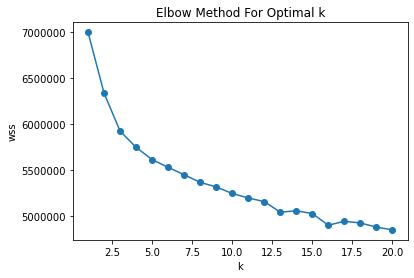

In [68]:
K=list(range(1,21))
plt.plot(K, mylist, marker = 'o')
plt.ticklabel_format(axis="y", style="plain")
plt.xlabel('k')
plt.ylabel('wss')
plt.title('Elbow Method For Optimal k')
plt.show()

In this case the plot is not very clear about the optimal k, but we can choose k = 13, because we want to minimize the wss, but. 

$\cdot$ *Silhouette Method* in which we calculate for each point: 

$$s_i = \frac{b_i-a_i}{max(ai,bi)}$$

$a_i$ is the *mean intra-cluster distance*, the mean distance between the point $x_i$ and all the points in the same cluster of $x_i$

$b_i$ is the *mean nearest-cluster distance*, the mean distance between the point $x_i$ and all the points in the nearest cluster of $x_i$

In [88]:
def silhouettescore(data, clusters, centroids, k):
    silho = list()
    for clu in range(k):
        datacluster = data[data["cluster"] == clu]
        for i in range(datacluster.shape [0]):
            a = np.mean(distance.cdist(datacluster.iloc[i:i+1,:-1], datacluster.iloc[:,:-1], 'euclidean'))
            dist = distance.cdist(datacluster.iloc[i:i+1,:-1], centroids, 'euclidean')
            nearestcluster = np.argsort(dist)[0][1]
            b = np.mean(distance.cdist(datacluster.iloc[i:i+1,:-1], data[data["cluster"] == nearestcluster].iloc[:,:-1], 'euclidean'))
            silho.append((b - a)/max(b, a))
    return np.mean(silho)

In [89]:
def silhouettemethod (dataframe,kmin, kmax, iterations):
    silhouette = list()
    for k in range(kmin,kmax):
        clust, dist, centroids = K_Means(dataframe,k,iterations)
        data = dataframe.copy()
        data['cluster'] = clust
        silhouette.append(silhouettescore(data, clust, centroids, k))
    return (silhouette)

In [90]:
values = silhouettemethod(dfpca,2,20,100)

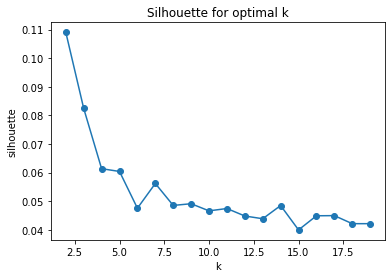

In [92]:
K=list(range(2,20))
plt.plot(K, values, marker = "o")
plt.ticklabel_format(axis="y", style="plain")
plt.xlabel('k')
plt.ylabel('silhouette')
plt.title('Silhouette for optimal k')
plt.show()

The silhouette score value is maximized for k = 2, and the second value for which the silhouette is maximized is 5.

We can't know what is the the real optimal k, because it depends on our goal. In this case k = 13 seems to be an acceptable k.

In [69]:
clustfinal, distfinal, centroidsfinal = K_Means(dfpca, 13, 100)

In [98]:
dataclusterfinal = dfpca.copy()
dataclusterfinal["cluster"] = clustfinal
dataclusterfinal.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,cluster
0,3.005227,-2.692146,-5.785975,4.535289,2.807772,1.876450,6.783434,-0.936042,-2.229150,4.612511,-4.559548,1.358909,-4.347862,5.180548,-0.332410,2.102559,-1.135134,-0.760272,1.810950,0.785624,-2.434904,-1.016725,-2.106466,1.855416,0.164381,2.594544,-0.849372,0.567268,-2.674732,1.657325,-1.094747,1.491201,-0.568989,-0.620462,-1.026052,1.579188,1.459515,-1.591884,2.496705,-0.277120,-0.517730,-3.430439,0.428088,-1.426741,-0.713404,-1.783889,-0.570790,2.086599,0.452752,-1.151964,1.341405,0.230849,1.198055,-1.249053,0.601545,-1.194247,-1.392211,0.200434,-0.246968,-1.298940,-0.961409,2.083138,0.105227,-0.800034,-0.593849,0
1,5.660262,-5.273787,-5.205453,-1.660559,-3.647710,2.598482,-1.562680,5.849242,-0.147735,4.402888,-1.975205,2.333594,-1.017385,3.803245,1.912077,0.937988,-2.270232,-3.840962,-0.166626,1.970812,0.067716,-1.420509,-0.093115,3.724351,0.026242,0.946036,0.807311,-0.586252,-1.728108,-0.370881,0.284342,1.340091,-0.557502,-0.543373,0.299763,2.860520,-0.717790,-1.343717,0.900749,3.150023,1.804378,-0.758046,-0.707706,-0.184522,-2.024161,-3.127196,-1.502800,-0.276525,0.880978,-0.035067,-0.067059,-0.412499,1.835475,0.130263,-1.311801,-2.130291,-1.170123,0.979210,-1.167462,-0.290518,-0.885321,0.669689,-0.434434,0.302520,-0.509284,3
2,2.542503,-3.989936,-4.602170,-0.022248,-3.011921,1.977457,-1.313339,-0.437229,-0.134744,2.069422,-1.901167,2.942114,-3.241928,2.486110,0.197200,1.882858,-0.866274,-3.065538,2.808268,-1.335724,-2.863677,-0.851650,2.325465,2.806531,-0.758848,2.206576,1.139998,-0.565486,-0.859217,-0.725061,-0.348496,-0.572297,2.979728,0.613918,-1.881598,0.412390,0.423324,-1.383836,-0.033730,2.246134,0.912954,-1.677269,0.184678,-0.883508,-1.345025,0.739974,-0.313747,0.789263,-1.560311,-2.303512,1.021459,0.886956,3.096141,-1.722852,-0.896581,-2.658587,-1.840679,-1.602690,-0.068739,0.664169,-1.407235,0.031284,-1.772612,0.498590,1.262289,0
3,9.132552,3.691115,-5.591380,0.703083,-1.415819,0.573410,-1.828961,4.096514,-0.553969,4.888736,-1.752694,6.634898,1.749282,0.193082,-1.509124,-4.695811,-0.087440,-2.308710,3.157058,-1.724883,-2.186574,3.434096,-3.491864,0.480563,1.796322,1.607104,-0.760835,-0.156910,4.946909,5.607200,1.678682,3.873285,1.038618,-0.907930,0.619166,0.196710,-6.049400,-1.846202,-0.587662,0.684801,-0.261483,-1.822574,0.851317,0.817143,-2.344205,-1.682157,-0.037464,0.365776,-2.521076,-2.939728,0.006084,-1.242766,0.029029,0.103039,1.526873,0.132438,0.295271,0.854872,-1.070156,-1.156469,-0.947787,1.202917,-0.065056,0.015646,-3.790451,0
4,1.226369,-9.314074,-4.208368,0.620496,-3.886939,-1.248008,-2.951836,-2.271016,-0.533076,2.695625,-0.429015,1.272986,-1.407669,0.961603,-0.900350,1.899476,2.044555,-1.923327,0.839099,2.709279,-0.404713,-1.730215,0.186395,0.136217,-0.940178,2.965288,1.501293,0.073207,-0.491962,1.876536,0.073688,-0.871346,0.165785,-1.188402,-2.600443,0.412613,0.342879,-0.988453,-1.756304,1.691345,-0.817439,-1.384394,-0.365042,-0.528921,0.216324,-1.409897,-0.382970,-0.070977,-0.875085,-0.733006,-0.297497,0.297386,-0.014805,-0.251041,0.999623,0.151432,-2.481204,1.327819,-2.342436,1.240273,-1.758112,2.123010,-1.800560,1.524809,0.350237,3


Now, we implement the *k-means++* in order to understand what are the differences between this and the k-means with a random inizialization.

In [93]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

First of all, we want to understand what is the optimal k, and we use, again, the elbow method and the silhouette method.

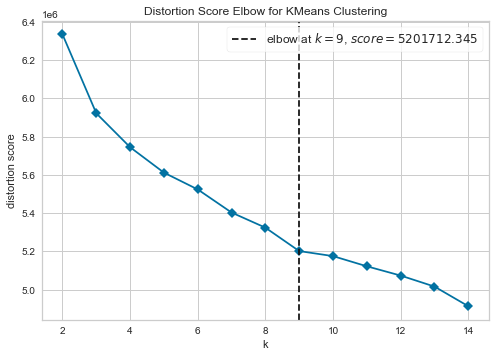

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [94]:
model = KMeans(init = 'k-means++')
vis = KElbowVisualizer(model, k = (2,15), metric = 'distortion', timings = False)
vis.fit(dfpca)
vis.show()

In this case, the optimal value is k = 9. 

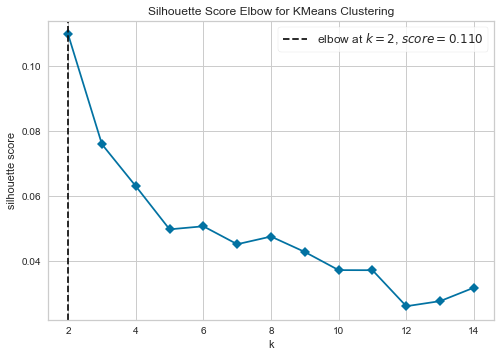

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [95]:
vis = KElbowVisualizer(model, k = (2,15), metric = 'silhouette', timings = False)
vis.fit(dfpca)
vis.show()

In this case the optimal k value is k=2, but the second value for whic the silhouette is maximized is k = 6. This result is not much different than the result obtained with our kmeans.

## 2.4 Analysing your results!

We select 8 features that are relevant in order to identify the genre of a song that are: *track_duration, audio_features_acousticness, audio_features_danceability,audio_features_energy, audio_features_instrumentalness, audio_features_liveness, audio_features_speechiness, audio_features_tempo.*

In [70]:
pivotgenre = pd.DataFrame(df[["track_duration", "audio_features_acousticness", "audio_features_danceability","audio_features_energy", 
                         "audio_features_instrumentalness", "audio_features_liveness", "audio_features_speechiness",
                         "audio_features_tempo"]])
pivotgenre.insert(0,"cluster", clustfinal)

In [71]:
pivotgenre.head()

,cluster,track_duration,audio_features_acousticness,audio_features_danceability,audio_features_energy,audio_features_instrumentalness,audio_features_liveness,audio_features_speechiness,audio_features_tempo
0,0,168,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922
1,3,237,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957
2,0,206,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260
3,0,161,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562
4,3,207,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290


The 8 variables we have chosen are quantitative variables, so we can categorize them into 4 categories.

In [72]:
pivotgenre["track_duration"] = pd.cut(pivotgenre["track_duration"], 4, labels = ["1", "2", "3", "4"])
pivotgenre["audio_features_acousticness"] = pd.cut(pivotgenre["audio_features_acousticness"], 4, labels = ["1", "2", "3", "4"])
pivotgenre["audio_features_danceability"] = pd.cut(pivotgenre["audio_features_danceability"], 4, labels = ["1", "2", "3", "4"])
pivotgenre["audio_features_energy"] = pd.cut(pivotgenre["audio_features_energy"], 4, labels = ["1", "2", "3", "4"])
pivotgenre["audio_features_instrumentalness"] = pd.cut(pivotgenre["audio_features_instrumentalness"], 4, labels = ["1", "2", "3", "4"])
pivotgenre["audio_features_liveness"] = pd.cut(pivotgenre["audio_features_liveness"], 4, labels = ["1", "2", "3", "4"])
pivotgenre["audio_features_speechiness"] = pd.cut(pivotgenre["audio_features_speechiness"], 4, labels = ["1", "2", "3", "4"])
pivotgenre["audio_features_tempo"] = pd.cut(pivotgenre["audio_features_tempo"], 4, labels = ["1", "2", "3", "4"])

In [73]:
pivotgenre.head()

,cluster,track_duration,audio_features_acousticness,audio_features_danceability,audio_features_energy,audio_features_instrumentalness,audio_features_liveness,audio_features_speechiness,audio_features_tempo
0,0,1,2,3,3,1,1,1,3
1,3,1,2,3,4,1,1,2,2
2,0,1,1,4,3,1,2,1,2
3,0,1,4,3,4,4,1,1,2
4,3,1,2,3,3,1,1,3,2


*Track Duration Pivot Table*

In [75]:
trackdurpivot = pd.crosstab(pivotgenre["track_duration"], pivotgenre["cluster"], normalize = "columns").round(4)*100
trackdurpivot.index = ['Category 1', 'Category 2', 'Category 3', 'Category 4']
trackdurpivot.loc["Total"] = trackdurpivot.sum(axis = 0, skipna = True)
trackdurpivot.rename({0: 'Cluster 1', 1: 'Cluster 2', 2: 'Cluster 3', 3: 'Cluster 4', 4: 'Cluster 5', 5: 'Cluster 6', 6: 'Cluster 7',
                    7: 'Cluster 8', 8: 'Cluster 9', 9: 'Cluster 10', 10: 'Cluster 11', 11: 'Cluster 12', 12: 'Cluster 13'}, axis=1)


cluster,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7,Cluster 8,Cluster 9,Cluster 10,Cluster 11,Cluster 12,Cluster 13
Category 1,99.15,99.08,99.01,98.94,99.77,99.11,99.84,98.38,91.87,98.74,99.45,94.84,98.86
Category 2,0.68,0.73,0.99,0.41,0.08,0.89,0.00,1.28,4.55,0.87,0.34,2.65,1.14
Category 3,0.11,0.18,0.00,0.33,0.15,0.00,0.16,0.17,2.75,0.29,0.14,1.33,0.00
Category 4,0.06,0.00,0.00,0.33,0.00,0.00,0.00,0.17,0.83,0.10,0.07,1.18,0.00
Total,100.00,99.99,100.00,100.01,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00


In every cluster there is a prevalence of the Category 1.

*Audio Features Acousticness Pivot Table*

In [76]:
acoustpivot = pd.crosstab(pivotgenre["audio_features_acousticness"], pivotgenre["cluster"], normalize = "columns").round(4)*100
acoustpivot.index = ['Category 1', 'Category 2', 'Category 3', 'Category 4']
acoustpivot.loc["Total"] = acoustpivot.sum(axis = 0, skipna = True)
acoustpivot.rename({0: 'Cluster 1', 1: 'Cluster 2', 2: 'Cluster 3', 3: 'Cluster 4', 4: 'Cluster 5', 5: 'Cluster 6', 6: 'Cluster 7',
                    7: 'Cluster 8', 8: 'Cluster 9', 9: 'Cluster 10', 10: 'Cluster 11', 11: 'Cluster 12', 12: 'Cluster 13'}, axis=1)

cluster,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7,Cluster 8,Cluster 9,Cluster 10,Cluster 11,Cluster 12,Cluster 13
Category 1,16.06,66.48,16.83,60.91,60.48,12.37,39.91,8.50,0.55,25.17,55.40,27.93,0.68
Category 2,11.21,16.21,7.92,18.00,10.59,9.95,12.30,7.40,0.69,12.49,18.51,15.11,0.00
Category 3,19.32,10.81,4.95,12.79,10.74,15.18,14.98,12.84,2.20,15.97,14.11,14.89,0.23
Category 4,53.41,6.50,70.30,8.31,18.18,62.50,32.81,71.26,96.56,46.37,11.98,42.08,99.09
Total,100.00,100.00,100.00,100.01,99.99,100.00,100.00,100.00,100.00,100.00,100.00,100.01,100.00


The Category 1 is more present in Cluster2, Cluster4, Cluster5, Cluster7 and Cluster 11.

The Category 4 is more present in Cluster1, Cluster3, Cluster 6, Cluster8, Cluster 9, Cluster 10, Cluster 12 and Cluster 13. 

In particular, almost all the songs that are in Cluster 13 have a audio features aucousticness that belongs to the Category4.


*Audio Features Danceability Pivot Table*

In [77]:
dancepivot =pd.crosstab(pivotgenre["audio_features_danceability"], pivotgenre["cluster"], normalize = "columns").round(4)*100
dancepivot.index = ['Category 1', 'Category 2', 'Category 3', 'Category 4']
dancepivot.loc["Total"] = dancepivot.sum(axis = 0, skipna = True)
dancepivot.rename({0: 'Cluster 1', 1: 'Cluster 2', 2: 'Cluster 3', 3: 'Cluster 4', 4: 'Cluster 5', 5: 'Cluster 6', 6: 'Cluster 7',
                    7: 'Cluster 8', 8: 'Cluster 9', 9: 'Cluster 10', 10: 'Cluster 11', 11: 'Cluster 12', 12: 'Cluster 13'}, axis=1)

cluster,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7,Cluster 8,Cluster 9,Cluster 10,Cluster 11,Cluster 12,Cluster 13
Category 1,18.03,4.85,41.58,1.22,36.51,14.92,36.59,13.44,25.62,17.52,9.15,4.57,19.36
Category 2,43.55,24.82,35.64,12.87,50.26,46.43,36.75,49.06,50.69,44.53,36.82,26.31,56.72
Category 3,32.90,46.25,21.78,42.75,13.00,35.20,20.35,35.20,21.90,35.43,47.83,47.02,22.32
Category 4,5.52,24.08,0.99,43.16,0.23,3.44,6.31,2.30,1.79,2.52,6.19,22.11,1.59
Total,100.00,100.00,99.99,100.00,100.00,99.99,100.00,100.00,100.00,100.00,99.99,100.01,99.99


The Category 1 is more present in Cluster 3.

The Category 2 is more present in Cluster1, Cluster 5, Cluster 6, Cluster 7, Cluster 8, Cluster 9, Cluster 10, Cluster 13.

The Category 3 is more present in Cluster 2, Cluster 11 and Cluster 12.

The Category 4 is more present only in Cluster 4.

*Audio Features Energy Pivot Table*

In [79]:
energypivot = pd.crosstab(pivotgenre["audio_features_energy"], pivotgenre["cluster"], normalize = "columns").round(4)*100
energypivot.index = ['Category 1', 'Category 2', 'Category 3', 'Category 4']
energypivot.loc["Total"] = energypivot.sum(axis = 0, skipna = True)
energypivot.rename({0: 'Cluster 1', 1: 'Cluster 2', 2: 'Cluster 3', 3: 'Cluster 4', 4: 'Cluster 5', 5: 'Cluster 6', 6: 'Cluster 7',
                    7: 'Cluster 8', 8: 'Cluster 9', 9: 'Cluster 10', 10: 'Cluster 11', 11: 'Cluster 12', 12: 'Cluster 13'}, axis=1)

cluster,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7,Cluster 8,Cluster 9,Cluster 10,Cluster 11,Cluster 12,Cluster 13
Category 1,3.55,11.17,73.27,1.30,0.60,26.53,6.15,44.47,87.47,14.52,0.62,21.89,74.72
Category 2,21.69,39.29,21.78,19.06,3.83,44.13,8.52,41.75,10.88,41.14,8.67,40.90,22.55
Category 3,43.32,36.72,3.96,41.69,20.21,24.74,22.24,12.16,1.38,34.75,37.99,28.22,2.51
Category 4,31.44,12.82,0.99,37.95,75.36,4.59,63.09,1.62,0.28,9.58,52.72,8.99,0.23
Total,100.00,100.00,100.00,100.00,100.00,99.99,100.00,100.00,100.01,99.99,100.00,100.00,100.01


The Category 1 is more present in Cluster 3, Cluster 8, Cluster and Cluster 13.

The Category 2 is more present in Cluster 2, Cluster 6, Cluster 8, Cluster 10 and Cluster 12.

The Category 3 is more present in Cluster 1, Cluster 4.

The Category 4 is more present in Cluster 5, Cluster 7 and Cluster 11. 

*Audio Features Instrumentalness Pivot Table*

In [80]:
instrupivot = pd.crosstab(pivotgenre["audio_features_instrumentalness"], pivotgenre["cluster"], normalize = "columns").round(4)*100
instrupivot.index = ['Category 1', 'Category 2', 'Category 3', 'Category 4']
instrupivot.loc["Total"] = instrupivot.sum(axis = 0, skipna = True)
instrupivot.rename({0: 'Cluster 1', 1: 'Cluster 2', 2: 'Cluster 3', 3: 'Cluster 4', 4: 'Cluster 5', 5: 'Cluster 6', 6: 'Cluster 7',
                    7: 'Cluster 8', 8: 'Cluster 9', 9: 'Cluster 10', 10: 'Cluster 11', 11: 'Cluster 12', 12: 'Cluster 13'}, axis=1)

cluster,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7,Cluster 8,Cluster 9,Cluster 10,Cluster 11,Cluster 12,Cluster 13
Category 1,15.10,12.45,0.99,25.49,19.31,22.07,10.09,22.19,23.55,21.78,41.64,38.39,15.26
Category 2,6.76,3.85,1.98,4.97,6.24,5.87,5.05,7.06,3.86,5.03,7.23,6.63,2.73
Category 3,12.56,9.16,3.96,9.85,10.44,9.06,9.78,10.63,7.85,9.49,14.32,11.64,2.73
Category 4,65.58,74.54,93.07,59.69,64.01,63.01,75.08,60.12,64.74,63.70,36.82,43.33,79.27
Total,100.00,100.00,100.00,100.00,100.00,100.01,100.00,100.00,100.00,100.00,100.01,99.99,99.99


The Category 1 is more present in Cluster11.

The Category 2 and the Category 3 are more present in no custer. 

The Category 4 is more present all the classes except in Cluster 11.


*Audio Features Liveness Pivot Table*

In [91]:
livepivot = pd.crosstab(pivotgenre["audio_features_liveness"], pivotgenre["cluster"], normalize = "columns").round(4)*100
livepivot.index = ['Category 1', 'Category 2', 'Category 3', 'Category 4']
livepivot.loc["Total"] = livepivot.sum(axis = 0, skipna = True)
livepivot.rename({0: 'Cluster 1', 1: 'Cluster 2', 2: 'Cluster 3', 3: 'Cluster 4', 4: 'Cluster 5', 5: 'Cluster 6', 6: 'Cluster 7',
                    7: 'Cluster 8', 8: 'Cluster 9', 9: 'Cluster 10', 10: 'Cluster 11', 11: 'Cluster 12', 12: 'Cluster 13'}, axis=1)


cluster,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7,Cluster 8,Cluster 9,Cluster 10,Cluster 11,Cluster 12,Cluster 13
Category 1,77.46,88.00,99.01,79.89,77.39,84.95,68.30,88.61,84.16,84.41,77.29,83.20,39.64
Category 2,14.31,9.98,0.99,14.98,17.28,10.46,22.24,6.97,7.16,11.52,15.83,12.82,38.72
Category 3,6.20,1.56,0.00,3.83,4.51,3.44,7.10,3.49,7.44,3.19,4.82,3.24,10.93
Category 4,2.03,0.46,0.00,1.30,0.83,1.15,2.37,0.94,1.24,0.87,2.06,0.74,10.71
Total,100.00,100.00,100.00,100.00,100.01,100.00,100.01,100.01,100.00,99.99,100.00,100.00,100.00


The Category 1 is more present in each cluster.

*Audio Features Speechiness Pivot Table*

In [82]:
speechpivot = pd.crosstab(pivotgenre["audio_features_speechiness"], pivotgenre["cluster"], normalize = "columns").round(4)*100
speechpivot.index = ['Category 1', 'Category 2', 'Category 3', 'Category 4']
speechpivot.loc["Total"] = speechpivot.sum(axis = 0, skipna = True)
speechpivot.rename({0: 'Cluster 1', 1: 'Cluster 2', 2: 'Cluster 3', 3: 'Cluster 4', 4: 'Cluster 5', 5: 'Cluster 6', 6: 'Cluster 7',
                    7: 'Cluster 8', 8: 'Cluster 9', 9: 'Cluster 10', 10: 'Cluster 11', 11: 'Cluster 12', 12: 'Cluster 13'}, axis=1)

cluster,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7,Cluster 8,Cluster 9,Cluster 10,Cluster 11,Cluster 12,Cluster 13
Category 1,92.79,92.40,98.02,69.95,99.25,99.36,94.16,98.98,98.21,99.03,93.12,75.76,86.56
Category 2,4.96,5.86,0.99,21.66,0.60,0.51,3.63,0.85,1.24,0.77,6.13,12.60,6.38
Category 3,1.75,1.19,0.00,6.03,0.15,0.13,1.58,0.17,0.41,0.19,0.55,5.38,2.28
Category 4,0.51,0.55,0.99,2.36,0.00,0.00,0.63,0.00,0.14,0.00,0.21,6.26,4.78
Total,100.01,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,99.99,100.01,100.00,100.00


The Category 1 is more present in each cluster.

*Audio Features Tempo Pivot Table*

In [99]:
tempopivot = pd.crosstab(pivotgenre["audio_features_tempo"], pivotgenre["cluster"], normalize = "columns").round(4)*100
tempopivot.index = ['Category 1', 'Category 2', 'Category 3', 'Category 4']
tempopivot.loc["Total"] = tempopivot.sum(axis = 0, skipna = True)
tempopivot.rename({0: 'Cluster 1', 1: 'Cluster 2', 2: 'Cluster 3', 3: 'Cluster 4', 4: 'Cluster 5', 5: 'Cluster 6', 6: 'Cluster 7',
                    7: 'Cluster 8', 8: 'Cluster 9', 9: 'Cluster 10', 10: 'Cluster 11', 11: 'Cluster 12', 12: 'Cluster 13'}, axis=1)

cluster,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7,Cluster 8,Cluster 9,Cluster 10,Cluster 11,Cluster 12,Cluster 13
Category 1,3.49,4.12,6.93,3.66,0.98,5.87,3.63,8.84,15.01,3.10,2.48,6.93,8.66
Category 2,54.03,60.81,62.38,61.64,47.86,65.18,50.32,62.24,65.29,61.57,55.82,59.91,64.69
Category 3,39.10,31.50,25.74,29.64,47.93,26.91,38.17,26.70,16.67,33.20,38.89,27.56,23.69
Category 4,3.38,3.57,4.95,5.05,3.23,2.04,7.89,2.21,3.03,2.13,2.82,5.60,2.96
Total,100.00,100.00,100.00,99.99,100.00,100.00,100.01,99.99,100.00,100.00,100.01,100.00,100.00


In each cluster the category more present is the Category 2.

We can understand what is the most representative genre for each one of the clusters:

In [83]:
realgenre = pd.DataFrame(df[["track_genre_top"]])
realgenre.insert(0,"cluster", clustfinal)

The variable "track_genre_top" contains a lots of null values. So, we create a new category of songs that are not defined. 

In [84]:
realgenre["track_genre_top"] =  realgenre["track_genre_top"].replace(np.nan, "Not Defined")

In [85]:
realgenre["track_genre_top"].unique()

array(['Hip-Hop', 'Pop', 'Folk', 'Jazz', 'Rock', 'Not Defined',
       'Electronic', 'International', 'Blues', 'Classical',
       'Old-Time / Historic', 'Instrumental', 'Experimental'],
      dtype=object)

In [86]:
pivot = pd.crosstab(realgenre["track_genre_top"], realgenre["cluster"],normalize = 'columns').round(4)*100
pivot.loc["Total"] = pivot.sum(axis = 0, skipna = True)
pivot.rename({0: 'Cluster 1', 1: 'Cluster 2', 2: 'Cluster 3', 3: 'Cluster 4', 4: 'Cluster 5', 5: 'Cluster 6', 6: 'Cluster 7',
                    7: 'Cluster 8', 8: 'Cluster 9', 9: 'Cluster 10', 10: 'Cluster 11', 11: 'Cluster 12', 12: 'Cluster 13'}, axis=1)

cluster,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7,Cluster 8,Cluster 9,Cluster 10,Cluster 11,Cluster 12,Cluster 13
track_genre_top,,,,,,,,,,,,,
Blues,0.85,0.09,0.00,0.08,0.00,0.89,0.00,1.28,0.69,0.97,0.21,0.66,0.00
Classical,0.39,0.09,5.94,0.00,0.00,0.89,0.00,2.21,26.31,0.29,0.48,0.37,2.73
Electronic,10.08,30.31,24.75,43.81,4.81,4.85,19.40,8.16,8.40,6.10,22.02,24.24,0.68
Experimental,0.11,0.09,0.00,0.00,0.15,0.13,0.00,0.17,0.28,0.00,0.28,0.15,0.23
Folk,3.72,1.83,13.86,0.24,0.90,21.05,2.21,22.96,13.64,11.71,1.45,2.51,7.97
Hip-Hop,8.39,11.45,3.96,20.85,0.60,0.64,6.31,0.94,0.28,1.55,9.57,11.42,0.00
Instrumental,0.90,0.37,0.00,0.00,0.23,0.77,0.47,1.70,0.83,0.77,0.14,1.11,0.23
International,1.30,0.00,1.98,0.08,0.15,3.44,1.26,1.70,1.52,0.39,1.17,1.03,0.91
Jazz,1.80,0.82,0.00,0.24,0.53,2.04,0.95,3.57,5.65,0.97,1.38,3.68,1.14


Cluster 1 is characterized by Rock songs.

Cluster 2 is characterized by Electronic songs.

Cluster 3 is characterized by Electronic songs.

Cluster 4 is characterized by Electronic songs.

Cluster 5 is characterized by Rock songs.

Cluster 6 is characterized by Rock songs.

Cluster 7 is characterized by Rock songs.

Cluster 8 is characterized by Folk songs.

Cluster 9 is characterized by Classical songs.

Cluster 10 is characterized by Rock songs.

Cluster 11 is characterized by Rock songs.

Cluster 12 is characterized by Electronic songs.

Cluster 13 is characterized by Old-Time / Historic.

Considering only the datasets *tracks* and *features*:

In [100]:
noechonest = tracks.merge(features)

In [101]:
noechonest.shape

(106574, 571)

In [102]:
noechonest.head()

,track_id,album_comments,album_date_created,album_date_released,album_engineer,album_favorites,album_id,album_information,album_listens,album_producer,album_tags,album_title,album_tracks,album_type,artist_active_year_begin,artist_active_year_end,artist_associated_labels,artist_bio,artist_comments,artist_date_created,artist_favorites,artist_id,artist_latitude,artist_location,artist_longitude,artist_members,artist_name,artist_related_projects,artist_tags,artist_website,artist_wikipedia_page,set_split,set_subset,track_bit_rate,track_comments,track_composer,track_date_created,track_date_recorded,track_duration,track_favorites,track_genre_top,track_genres,track_genres_all,track_information,track_interest,track_language_code,track_license,track_listens,track_lyricist,track_number,track_publisher,track_tags,track_title,chroma_cens_kurtosis_01,chroma_cens_kurtosis_02,chroma_cens_kurtosis_03,chroma_cens_kurtosis_04,chroma_cens_kurtosis_05,chroma_cens_kurtosis_06,chroma_cens_kurtosis_07,chroma_cens_kurtosis_08,chroma_cens_kurtosis_09,chroma_cens_kurtosis_10,chroma_cens_kurtosis_11,chroma_cens_kurtosis_12,chroma_cens_max_01,chroma_cens_max_02,chroma_cens_max_03,chroma_cens_max_04,chroma_cens_max_05,chroma_cens_max_06,chroma_cens_max_07,chroma_cens_max_08,chroma_cens_max_09,chroma_cens_max_10,chroma_cens_max_11,chroma_cens_max_12,chroma_cens_mean_01,chroma_cens_mean_02,chroma_cens_mean_03,chroma_cens_mean_04,chroma_cens_mean_05,chroma_cens_mean_06,chroma_cens_mean_07,chroma_cens_mean_08,chroma_cens_mean_09,chroma_cens_mean_10,chroma_cens_mean_11,chroma_cens_mean_12,chroma_cens_median_01,chroma_cens_median_02,chroma_cens_median_03,chroma_cens_median_04,chroma_cens_median_05,chroma_cens_median_06,chroma_cens_median_07,chroma_cens_median_08,chroma_cens_median_09,chroma_cens_median_10,chroma_cens_median_11,chroma_cens_median_12,chroma_cens_min_01,chroma_cens_min_02,chroma_cens_min_03,chroma_cens_min_04,chroma_cens_min_05,chroma_cens_min_06,chroma_cens_min_07,chroma_cens_min_08,chroma_cens_min_09,chroma_cens_min_10,chroma_cens_min_11,chroma_cens_min_12,chroma_cens_skew_01,chroma_cens_skew_02,chroma_cens_skew_03,chroma_cens_skew_04,chroma_cens_skew_05,chroma_cens_skew_06,chroma_cens_skew_07,chroma_cens_skew_08,chroma_cens_skew_09,chroma_cens_skew_10,chroma_cens_skew_11,chroma_cens_skew_12,chroma_cens_std_01,chroma_cens_std_02,chroma_cens_std_03,chroma_cens_std_04,chroma_cens_std_05,chroma_cens_std_06,chroma_cens_std_07,chroma_cens_std_08,chroma_cens_std_09,chroma_cens_std_10,chroma_cens_std_11,chroma_cens_std_12,chroma_cqt_kurtosis_01,chroma_cqt_kurtosis_02,chroma_cqt_kurtosis_03,chroma_cqt_kurtosis_04,chroma_cqt_kurtosis_05,chroma_cqt_kurtosis_06,chroma_cqt_kurtosis_07,chroma_cqt_kurtosis_08,chroma_cqt_kurtosis_09,chroma_cqt_kurtosis_10,chroma_cqt_kurtosis_11,chroma_cqt_kurtosis_12,chroma_cqt_max_01,chroma_cqt_max_02,chroma_cqt_max_03,chroma_cqt_max_04,chroma_cqt_max_05,chroma_cqt_max_06,chroma_cqt_max_07,chroma_cqt_max_08,chroma_cqt_max_09,chroma_cqt_max_10,chroma_cqt_max_11,chroma_cqt_max_12,chroma_cqt_mean_01,chroma_cqt_mean_02,chroma_cqt_mean_03,chroma_cqt_mean_04,chroma_cqt_mean_05,chroma_cqt_mean_06,chroma_cqt_mean_07,chroma_cqt_mean_08,chroma_cqt_mean_09,chroma_cqt_mean_10,chroma_cqt_mean_11,chroma_cqt_mean_12,chroma_cqt_median_01,chroma_cqt_median_02,chroma_cqt_median_03,chroma_cqt_median_04,chroma_cqt_median_05,chroma_cqt_median_06,chroma_cqt_median_07,chroma_cqt_median_08,chroma_cqt_median_09,chroma_cqt_median_10,chroma_cqt_median_11,chroma_cqt_median_12,chroma_cqt_min_01,chroma_cqt_min_02,chroma_cqt_min_03,chroma_cqt_min_04,chroma_cqt_min_05,chroma_cqt_min_06,chroma_cqt_min_07,chroma_cqt_min_08,chroma_cqt_min_09,chroma_cqt_min_10,chroma_cqt_min_11,chroma_cqt_min_12,chroma_cqt_skew_01,chroma_cqt_skew_02,chroma_cqt_skew_03,chroma_cqt_skew_04,chroma_cqt_skew_05,chroma_cqt_skew_06,chroma_cqt_skew_07,chroma_cqt_skew_08,chroma_cqt_skew_09,chroma_cqt_skew_10,chroma_cqt_skew_11,chroma_cqt_skew_12,chroma_cqt_std_01,chroma_cqt_std_02,chroma_c

In [103]:
noechonest = noechonest.select_dtypes("number")

In [104]:
navalues1 = pd.DataFrame(noechonest.isna().sum())
navalues1 = navalues1[navalues1[0] != 0]
navalues1

,0
artist_latitude,62030
artist_longitude,62030


In [105]:
noechonest = noechonest.drop(["artist_latitude", "artist_longitude"], axis= 1)

In [106]:
pca_noechonest = pd.DataFrame(StandardScaler().fit_transform(noechonest))

In [107]:
pca = PCA(n_components= 55)
pca_noechonest = pca.fit_transform(pca_noechonest)
print((pca.explained_variance_ratio_))
print(sum(pca.explained_variance_ratio_))

[0.11637753 0.06608968 0.04084815 0.03263014 0.0289114  0.02707917
 0.02446738 0.0233291  0.02201985 0.0204652  0.01754156 0.01537588
 0.01411467 0.01329209 0.01260321 0.01209621 0.01070496 0.0104115
 0.00989164 0.00897094 0.00837822 0.00831495 0.0079596  0.00782038
 0.00723977 0.00707745 0.00696918 0.00662862 0.00647887 0.00633329
 0.00605703 0.00591631 0.00558691 0.00536187 0.00520812 0.00499769
 0.00489447 0.00474962 0.00462644 0.00456283 0.00446108 0.00437775
 0.00414581 0.00412202 0.00406416 0.00397487 0.00389622 0.00379368
 0.0037314  0.00366534 0.0035413  0.00346026 0.00334662 0.00323946
 0.00313802]
0.7093398562257079


PCA allowed us to reduce dimensionality to 55 features preserving 70.00% of the total variance.

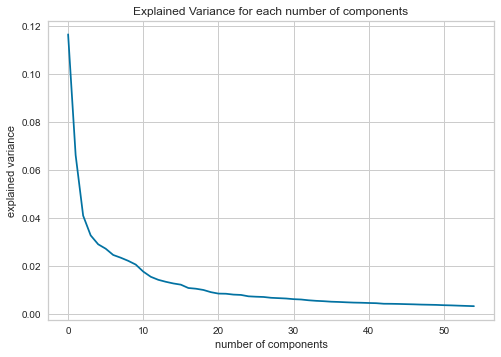

In [108]:
plt.plot(pca.explained_variance_ratio_)
plt.ticklabel_format(axis="y", style="plain")
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.title('Explained Variance for each number of components')
plt.show()

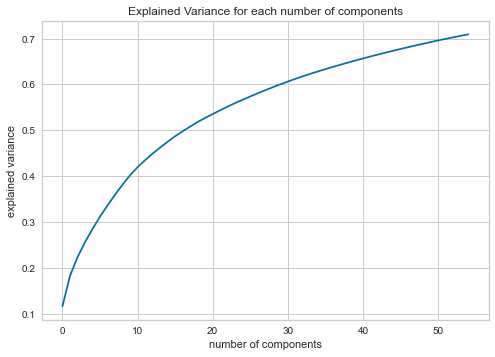

In [109]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.ticklabel_format(axis="y", style="plain")
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.title('Explained Variance for each number of components')
plt.show()

In order to group the songs, in this case we use the Kmeans++, and, in order to identify the optimal k we use two methods:

$\cdot$ Elbow Method 

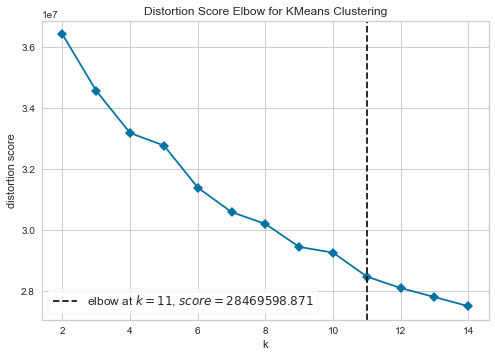

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [110]:
model = KMeans(init = 'k-means++')
vis = KElbowVisualizer(model, k = (2,15), metric = 'distortion', timings = False)
vis.fit(pca_noechonest)
vis.show()

$\cdot$ *Silhouette Method*

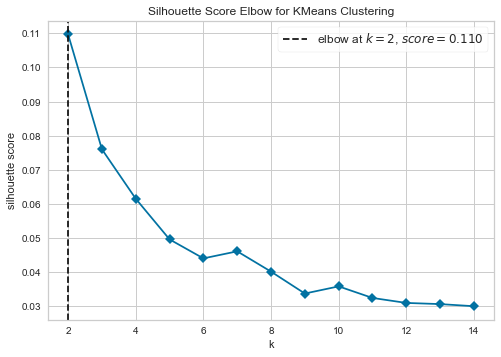

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [111]:
model = KMeans(init = 'k-means++')
vis = KElbowVisualizer(model, k = (2,15), metric = 'silhouette', timings = False)
vis.fit(dfpca)
vis.show()

Considering the results of the Elbow Method, we choose k = 11

In [113]:
kmeans_scikit = KMeans(init="k-means++", n_clusters= 11).fit(pca_noechonest) #Compute k-means clustering
centroids = kmeans_scikit.cluster_centers_
labels = kmeans_scikit.labels_

In [114]:
clusterpca_noechonest = pd.DataFrame(pca_noechonest.copy())
clusterpca_noechonest["cluster"] = labels

In [115]:
clusterpca_noechonest.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,cluster
0,2.090455,-3.057750,-5.701776,0.100213,2.036641,-3.766579,-5.021284,-1.005870,-5.127427,-4.114381,3.582508,-1.212024,-2.105863,-1.635247,0.196544,0.410822,-0.811894,-1.589957,0.323182,-1.779281,1.060276,-0.871445,-2.326476,2.119219,-0.446568,-0.033355,-3.202387,-0.239492,0.863638,-1.607960,0.533809,0.559568,-1.068061,-0.386689,1.810534,1.953450,0.115862,2.313695,0.353992,-1.160818,-0.615819,0.801099,-0.681757,1.484496,-1.668527,-1.138743,-0.181145,-0.444976,-0.183661,1.943491,-0.083143,1.196661,-0.282734,-0.372311,-0.916721,0
1,3.536155,-5.354654,-4.468584,-1.076690,-3.124541,2.226706,-0.329121,4.725787,-0.633588,-3.462072,3.009150,0.102269,-0.815324,0.981396,-1.068008,-2.492962,0.192079,-0.534794,-1.832490,-1.080975,-0.608547,-2.015810,-2.083501,3.201835,-0.942527,-0.101418,-2.780342,1.558660,1.687661,-0.803330,2.354176,0.029322,0.602486,0.143250,1.762107,0.490060,2.710060,0.791623,2.556690,-0.560282,0.854469,0.227116,-0.553955,1.405713,-0.705413,-0.107652,0.734462,0.282582,0.457759,1.945837,-1.276848,-0.459701,0.401408,0.376405,0.176473,0
2,0.980858,-3.146281,-3.630116,-0.901554,-1.230265,0.402825,-2.431709,1.235177,0.962468,-1.777301,2.837249,-2.385413,-0.651081,0.526528,0.094266,-0.459709,-0.895154,-0.988203,1.088110,-2.673236,-0.330273,-0.809520,-2.672599,1.597458,1.532344,-3.266123,-1.917746,-1.873036,1.563674,-2.150568,-1.105955,1.144798,-0.292857,-0.941727,1.510022,0.201966,2.733852,1.607572,0.618523,-2.487674,1.305021,0.020020,0.553596,0.585030,-1.058039,-0.880442,0.810261,-0.105604,-0.979451,2.586154,-1.196467,1.583582,-1.076222,-0.048913,-2.277574,5
3,6.520792,1.509366,-4.940383,-0.946538,-2.142548,0.112143,0.153585,3.853207,0.297602,-3.015374,1.260831,0.931277,-0.440045,2.908680,2.417707,-1.844778,-1.554861,-0.314489,-1.348651,0.079350,2.310680,-2.759208,-2.000344,1.236282,7.602236,0.132869,-0.356218,1.294413,-3.659373,6.742509,-0.638514,0.825571,-1.395769,-0.292064,1.857474,1.315032,2.939701,2.826109,0.621094,-0.257005,1.641275,-0.442251,0.977530,-0.446053,-1.214763,-0.352100,2.370577,-0.712832,-1.214273,-2.066596,-1.343231,1.351223,-1.261137,1.987828,-2.498648,5
4,0.889526,-1.108151,2.836584,-0.770078,-2.502579,4.497927,-0.257908,-1.791026,1.010771,-2.030772,-0.835072,-2.031039,1.300420,5.786114,0.201241,0.578624,1.969540,0.924154,0.637740,1.172792,-1.696376,1.296144,0.629349,0.801955,-0.701674,0.570704,0.943056,1.918181,0.333287,-0.895402,1.971031,-2.038697,-1.399003,0.487696,2.217750,1.672766,1.527961,-0.306836,1.435314,-2.140237,-1.408169,0.993172,1.770410,1.220255,-0.263910,0.357942,-0.289533,-0.672944,-0.872382,-0.235523,-0.376906,0.127877,-0.027890,-0.371694,-0.343535,5


In this case we select 5 features that are relevant: "track_duration", "chroma_cens_median_01", "rmse_median_01", "tonnetz_median_01", "track_bit_rate".

In [116]:
new_pivot = pd.DataFrame(noechonest[["track_duration", "chroma_cens_median_01", "rmse_median_01", "tonnetz_median_01", "track_bit_rate"]])
new_pivot.insert(0,"cluster", labels)

#categorize the variables into 4 categories
new_pivot["track_duration"] = pd.cut(new_pivot["track_duration"], 4, labels = ["1", "2", "3", "4"])
new_pivot["chroma_cens_median_01"] = pd.cut(new_pivot["chroma_cens_median_01"], 4, labels = ["1", "2", "3", "4"])
new_pivot["rmse_median_01"] = pd.cut(new_pivot["rmse_median_01"], 4, labels = ["1", "2", "3", "4"])
new_pivot["tonnetz_median_01"] = pd.cut(new_pivot["tonnetz_median_01"], 4, labels = ["1", "2", "3", "4"])
new_pivot["track_bit_rate"] = pd.cut(new_pivot["track_bit_rate"], 4, labels = ["1", "2", "3", "4"])

*Track duration Pivot Table*

In [117]:
trackdurpivot = pd.crosstab(new_pivot["track_duration"], new_pivot["cluster"], normalize = "columns").round(4)*100
trackdurpivot.index = ['Category 1', 'Category 2', 'Category 3', 'Category 4']
trackdurpivot.loc["Total"] = trackdurpivot.sum(axis = 0, skipna = True)
trackdurpivot.rename({0: 'Cluster 1', 1: 'Cluster 2', 2: 'Cluster 3', 3: 'Cluster 4', 4: 'Cluster 5', 5: 'Cluster 6', 6: 'Cluster 7',
                    7: 'Cluster 8', 8: 'Cluster 9', 9: 'Cluster 10', 10: 'Cluster 11'}, axis=1)

cluster,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7,Cluster 8,Cluster 9,Cluster 10,Cluster 11
Category 1,100.0,99.99,100.0,100.0,100.0,100.0,99.99,100.0,99.99,100.0,99.88
Category 2,0.0,0.00,0.0,0.0,0.0,0.0,0.01,0.0,0.00,0.0,0.12
Category 3,0.0,0.01,0.0,0.0,0.0,0.0,0.00,0.0,0.01,0.0,0.00
Category 4,0.0,0.01,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00
Total,100.0,100.01,100.0,100.0,100.0,100.0,100.00,100.0,100.00,100.0,100.00


In this case all the clusters contains songs that have only track_durations that belongs to the Category1, except Cluster 9 and Cluster 11.

*Chroma cens median 01 Pivot Table*

In [118]:
chroma_cens_median_01pivot = pd.crosstab(new_pivot["chroma_cens_median_01"], new_pivot["cluster"], normalize = "columns").round(4)*100
chroma_cens_median_01pivot.index = ['Category 1', 'Category 2', 'Category 3', 'Category 4']
chroma_cens_median_01pivot.loc["Total"] = chroma_cens_median_01pivot.sum(axis = 0, skipna = True)
chroma_cens_median_01pivot.rename({0: 'Cluster 1', 1: 'Cluster 2', 2: 'Cluster 3', 3: 'Cluster 4', 4: 'Cluster 5', 5: 'Cluster 6', 6: 'Cluster 7',
                    7: 'Cluster 8', 8: 'Cluster 9', 9: 'Cluster 10', 10: 'Cluster 11'}, axis=1)

cluster,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7,Cluster 8,Cluster 9,Cluster 10,Cluster 11
Category 1,18.78,22.09,46.20,15.29,53.85,27.53,36.93,34.93,50.37,80.0,23.11
Category 2,78.15,75.13,50.47,80.14,23.08,70.81,55.60,52.83,47.41,20.0,64.67
Category 3,3.08,2.76,3.31,4.44,15.38,1.66,7.23,11.30,2.22,0.0,10.51
Category 4,0.00,0.02,0.02,0.12,7.69,0.00,0.25,0.95,0.00,0.0,1.71
Total,100.01,100.00,100.00,99.99,100.00,100.00,100.01,100.01,100.00,100.0,100.00


The Category 1 is more present in Cluster 5, Cluster 9 and Cluster 10.

The Category 2 is more present in Cluster 1, Cluster 2, Cluster 3, Cluster 4, Cluster 6, Cluster 7, Cluster 8, Cluster 11.

*Rmse median 01 Pivot Table*

In [119]:
rmse_median_01pivot = pd.crosstab(new_pivot["rmse_median_01"], new_pivot["cluster"], normalize = "columns").round(4)*100
rmse_median_01pivot.index = ['Category 1', 'Category 2', 'Category 3', 'Category 4']
rmse_median_01pivot.loc["Total"] = rmse_median_01pivot.sum(axis = 0, skipna = True)
rmse_median_01pivot.rename({0: 'Cluster 1', 1: 'Cluster 2', 2: 'Cluster 3', 3: 'Cluster 4', 4: 'Cluster 5', 5: 'Cluster 6', 6: 'Cluster 7',
                    7: 'Cluster 8', 8: 'Cluster 9', 9: 'Cluster 10', 10: 'Cluster 11'}, axis=1)

cluster,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7,Cluster 8,Cluster 9,Cluster 10,Cluster 11
Category 1,74.04,89.15,98.23,81.04,73.08,87.53,97.04,79.27,94.41,80.0,72.25
Category 2,24.23,10.58,1.73,16.44,23.08,11.95,2.87,19.89,5.53,0.0,21.88
Category 3,1.34,0.24,0.03,2.26,3.85,0.46,0.08,0.80,0.05,0.0,4.77
Category 4,0.39,0.02,0.00,0.26,0.00,0.05,0.00,0.03,0.01,20.0,1.10
Total,100.00,99.99,99.99,100.00,100.01,99.99,99.99,99.99,100.00,100.0,100.00


The Category 1 is more present in each cluster.

*Tonnetz Median 01 Pivot Table*

In [123]:
tonnetz_median_01pivot = pd.crosstab(new_pivot["tonnetz_median_01"], new_pivot["cluster"],normalize = "columns").round(4)*100
tonnetz_median_01pivot.index = ['Category 1', 'Category 2', 'Category 3', 'Category 4']
tonnetz_median_01pivot.loc["Total"] = tonnetz_median_01pivot.sum(axis = 0, skipna = True)
tonnetz_median_01pivot.rename({0: 'Cluster 1', 1: 'Cluster 2', 2: 'Cluster 3', 3: 'Cluster 4', 4: 'Cluster 5', 5: 'Cluster 6', 6: 'Cluster 7',
                    7: 'Cluster 8', 8: 'Cluster 9', 9: 'Cluster 10', 10: 'Cluster 11'}, axis=1)

cluster,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7,Cluster 8,Cluster 9,Cluster 10,Cluster 11
Category 1,0.00,0.01,0.07,0.05,0.00,0.00,0.06,0.29,0.01,0.0,0.98
Category 2,82.95,83.98,75.96,73.43,76.92,66.00,58.59,79.56,67.31,100.0,76.65
Category 3,17.05,16.01,23.96,26.49,23.08,33.99,41.33,20.12,32.68,0.0,22.00
Category 4,0.00,0.00,0.02,0.03,0.00,0.00,0.01,0.03,0.00,0.0,0.37
Total,100.00,100.00,100.01,100.00,100.00,99.99,99.99,100.00,100.00,100.0,100.00


The Category 2 is more present in each cluster.

*Track Bit Rate Pivot Table*

In [121]:
track_bit_ratepivot = pd.crosstab(new_pivot["track_bit_rate"], new_pivot["cluster"],normalize = "columns").round(4)*100
track_bit_ratepivot.index = ['Category 1', 'Category 2', 'Category 3', 'Category 4']
track_bit_ratepivot.loc["Total"] = track_bit_ratepivot.sum(axis = 0, skipna = True)
track_bit_ratepivot.rename({0: 'Cluster 1', 1: 'Cluster 2', 2: 'Cluster 3', 3: 'Cluster 4', 4: 'Cluster 5', 5: 'Cluster 6', 6: 'Cluster 7',
                    7: 'Cluster 8', 8: 'Cluster 9', 9: 'Cluster 10', 10: 'Cluster 11'}, axis=1)

cluster,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7,Cluster 8,Cluster 9,Cluster 10,Cluster 11
Category 1,1.10,1.27,2.24,2.54,7.69,1.29,2.18,0.78,0.76,0.0,1.47
Category 2,23.71,25.38,25.42,27.53,7.69,28.23,30.95,20.67,27.54,0.0,23.35
Category 3,75.19,73.35,72.32,69.92,84.62,70.48,66.87,78.54,71.70,100.0,75.18
Category 4,0.00,0.00,0.02,0.01,0.00,0.00,0.00,0.01,0.00,0.0,0.00
Total,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.0,100.00


The Category 3 is more present in each cluster.

It's preferable to have more observations with fewer features, because more variables could create the problem of the curse of dimensionality. but you have to be sure that you have variables that are really relevant to the identification of observations.